# Netflix 연도별 컨텐츠 분석


### load library

In [2]:
!pip install plotly

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

### load dataset
 - [Netflix dataset](https://www.kaggle.com/shivamb/netflix-shows)
 - IMDB dataset
  - [ratings](https://datasets.imdbws.com/title.ratings.tsv.gz)
  - [basics](https://datasets.imdbws.com/title.basics.tsv.gz)

In [3]:
netflix_origin = pd.read_csv('./data/netflix_titles.csv')
netflix_origin.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_origin.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

date_added 결측치 
- 10개 drop

In [5]:
netflix_origin = netflix_origin.loc[netflix_origin['date_added'].isnull() == False]

netflix_origin["date_added"] = pd.to_datetime(netflix_origin['date_added'])
netflix_origin['year_added'] = netflix_origin['date_added'].dt.year
netflix_origin['month_added'] = netflix_origin['date_added'].dt.month

#실수형을 정수로변환
netflix_origin["year_added"] = netflix_origin["year_added"].astype(np.int64)
netflix_origin["month_added"] = netflix_origin["month_added"].astype(np.int64)

In [6]:
imdb_ratings = pd.read_csv('./data/data.tsv', sep='\t')
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459


In [7]:
imdb_basics = pd.read_csv('./data/basics_data.tsv', sep='\t')
imdb_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [8]:
len(set(imdb_basics.tconst)) # 8749012 모두 고유한 영화 index
len(set(imdb_ratings.tconst)) # 1221334 모두 고유한 영화 index

1221334

In [9]:
#컨텐츠 타입 
imdb_basics.titleType.unique() 

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

### Dataset join

In [10]:
#컨텐츠 타입중 movie와 tvSeries만 사용
imdb_basics=imdb_basics[ (imdb_basics.titleType=='movie') | (imdb_basics.titleType=='tvSeries') ] 
imdb_basics=imdb_basics[imdb_basics.startYear.apply(lambda x: str(x).isnumeric())] #startYear join시 사용
imdb=pd.merge(imdb_ratings.set_index('tconst'), imdb_basics.set_index('tconst'), left_index=True, right_index=True, how='inner')

In [12]:
print(imdb.shape)
imdb.head()

(356045, 10)


,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000502,4.5,14,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,6.0,755,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,3.8,24,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [13]:
imdb.startYear.values

array([1905, 1906, 1907, ..., '2019', '2019', '2017'], dtype=object)

In [14]:
imdb.startYear = imdb.startYear.astype(np.int64)
netflix_origin['title']=netflix_origin['title'].str.lower()
imdb['primaryTitle']=imdb['primaryTitle'].str.lower()

netfilx_imdb=pd.merge(netflix_origin, imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'], how='inner')
netfilx_imdb.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,7.4,6233,movie,dick johnson is dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama"
1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,7.0,2342,tvSeries,ganglands,Braqueurs,0,2021,\N,44,"Action,Crime,Drama"
2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,6.7,194,tvSeries,jailbirds new orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV"
3,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,6.9,3261,movie,my little pony: a new generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy"
4,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,7.0,662,movie,sankofa,Sankofa,0,1993,\N,125,Drama


In [15]:
df_netfilx = netfilx_imdb[['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year',  'description', 'year_added', 'month_added', 'averageRating', 'numVotes', 
       'primaryTitle', 'originalTitle', 'rating', 'isAdult', 'startYear', 'endYear',
        'duration', 'runtimeMinutes', 'genres']]

# Movie 
df_movie = df_netfilx[df_netfilx.type =='Movie'].reset_index(drop=True)
# TvShow 
df_tvshow = df_netfilx[df_netfilx.type =='TV Show'].reset_index(drop=True)

---
### EDA

In [16]:
list_added_year= list(set(df_tvshow.year_added))
list_added_year = sorted(list_added_year)
print(len(list_added_year), list_added_year)

7 [2015, 2016, 2017, 2018, 2019, 2020, 2021]


Text(0.5, 1.0, 'Contents over the years')

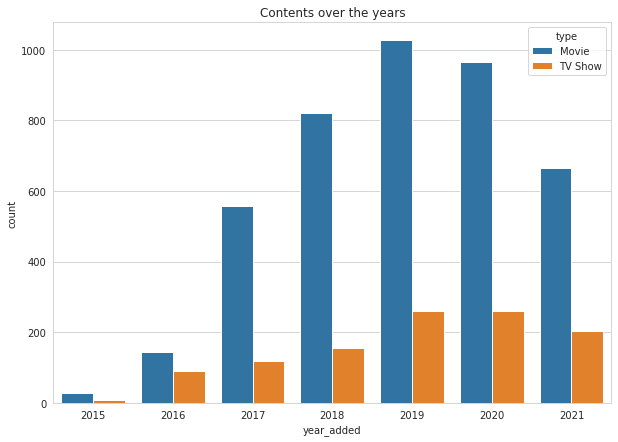

In [17]:
# 연도별 컨텐츠 개수
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(data=df_netfilx, x='year_added' , hue='type', order=list_added_year)
plt.title('Contents over the years')

- 연도별 컨텐츠 등록 데이터 분석
 - 2015년부터 Movie, TvShow 대해 모두 넷플릭스에 등록되는 컨텐츠가 많아지고 있습니다. 
 - TV Show의 등록수가 Movie에 비해 적은 수치이지만 이는 Tv show의 경우 시즌 1개가 하나의 카운트로 잡혔기 때문으로 넷플릭스가 Movie에 대해서만 많이 투자하는 것은 아닙니다.

- 두분야에 대해 상세하게 알아보면 아래의 그래프처럼 연도별에 따라 비슷한 흐름으로 컨텐츠가 등록되고 있는것을 알 수 있습니다.

Text(0.5, 1.0, 'Contents over the years on a TV show')

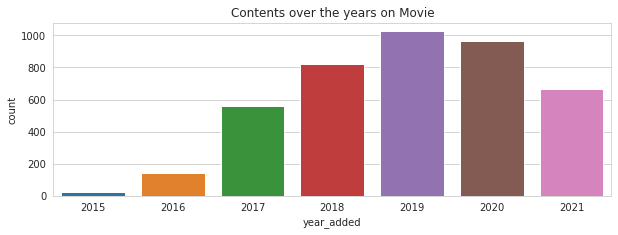

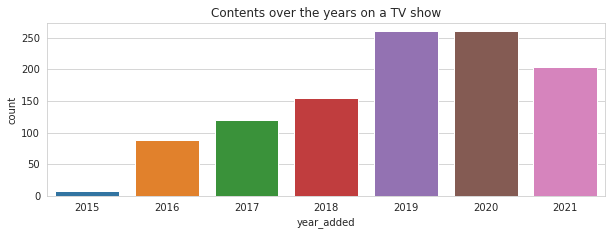

In [18]:
# 연도별 Movie 컨텐츠 개수
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.countplot(data=df_movie, x='year_added', order=list_added_year)
plt.title('Contents over the years on Movie')

# 연도별 TvShow 컨텐츠 개수
plt.figure(figsize=(10,7))
plt.subplot(212)
sns.countplot(data=df_tvshow, x='year_added', order=list_added_year)
plt.title('Contents over the years on a TV show')

- 연도별 컨텐츠 등록 데이터 분석2
 - 2019년에 갑자기 등록되는 컨텐츠가 늘어납니다. 코로나의 영향으로 집에서 영화를 보는 사람이 늘어나서일까요?
 - 2018년과 2019년 월별 데이터를 분석해보겠습니다. 
 

- 2016년??

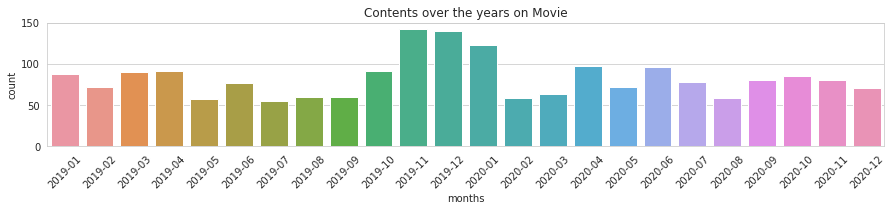

In [19]:
df_movie['month_added'] = df_movie['month_added'].apply(lambda x: "{:0>2d}".format(x))
df_movie['months'] = df_movie.year_added.map(str) + "-" + df_movie.month_added
df_monthmv = df_movie[(df_movie.year_added==2019 )|(df_movie.year_added==2020 )].sort_values('months')


# 월별 Movie 컨텐츠수
plt.figure(figsize=(15,5))
plt.subplot(211)
g = sns.countplot(data=df_monthmv, x='months')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Contents over the years on Movie')
plt.show()

### 2019~ 2020년 월별 컨텐츠 등록수 
- 디즈니 플러스, 애플TV 서비스 런칭의 영향
 - 코로나19는 2019년 12월 중국 우한시에서 처음 확인되었고 이후 2020년 3월에 펜데믹 즉 세계적 범유행했는데 단지 코로나의 영향으로 컨텐츠가 2019년에 늘어난것은 아닌 것으로 보입니다. 이는 2019년 11월 1일 디즈니 플러스와 애플 티비 플러스 서비스가 미국에서 동시에 런칭되었기 때문입니다.경쟁자들과의 대결이 본격화되는 시기에 이루어진 투자로 보는것이 맞겠습니다.
  
- 코로나의 영향
 - 2020년과 2021년 계속적으로 많은 컨텐츠가 등록되고 있는것은 코로나의 여파로 인 것 같습니다.


---
### 연도별 작품 평가수
- 한 작품당 평가하는 수가 얼마나 늘고 있는지를 알아보겠습니다. 이를 통해 연도별로 컨텐츠 사용자가 컨텐츠에 대해 얼마나 소비하고 있는지 살펴볼수 있습니다.
 

In [20]:
df_counts = df_netfilx.groupby(['year_added']).sum()
df_counts['sizes'] = df_netfilx.groupby(['year_added']).size()
df_counts['meanVotes'] = (df_counts.numVotes / df_counts.sizes).astype(np.int64)

Text(0.5, 1.0, 'Mean of votes over the years')

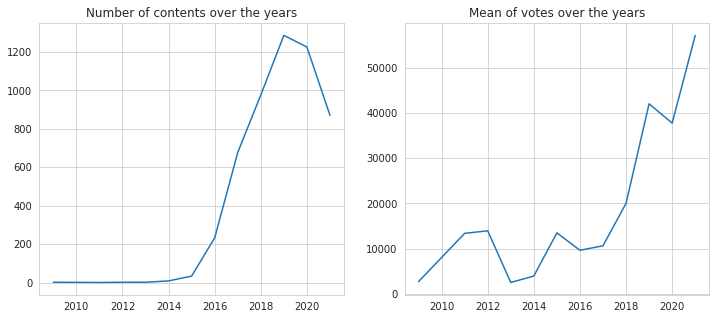

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(df_counts.index, df_counts.sizes)
plt.title('Number of contents over the years')

#sns.lineplot(data=df_counts, x='sizes') #contents size

plt.subplot(122)
plt.plot(df_counts.index, df_counts.meanVotes)
plt.title('Mean of votes over the years')

작품수가 증가함에따라 평가가 늘어나는 것은 당연하지만 한 컨텐츠당 평균적으로 평가하는 수 또한 늘고 있습니다. 이는 컨텐츠를 보는 사용자(구독자)수가 컨텐츠가 늘어남에 따라 늘어난 결과입니다. 또한 사용자는 작품에 대해 평가를 남겨 컨텐츠에 대해 좀더 능동적으로 소비하는 경향을 보이고 있습니다.

---
### 인기 컨텐츠 및 평점이 높은 컨텐츠 분석


In [22]:
df_movie['averageRating'].describe()

count    4224.000000
mean        6.198580
std         1.160051
min         1.500000
25%         5.500000
50%         6.300000
75%         7.000000
max         9.100000
Name: averageRating, dtype: float64

<AxesSubplot:xlabel='averageRating', ylabel='Density'>

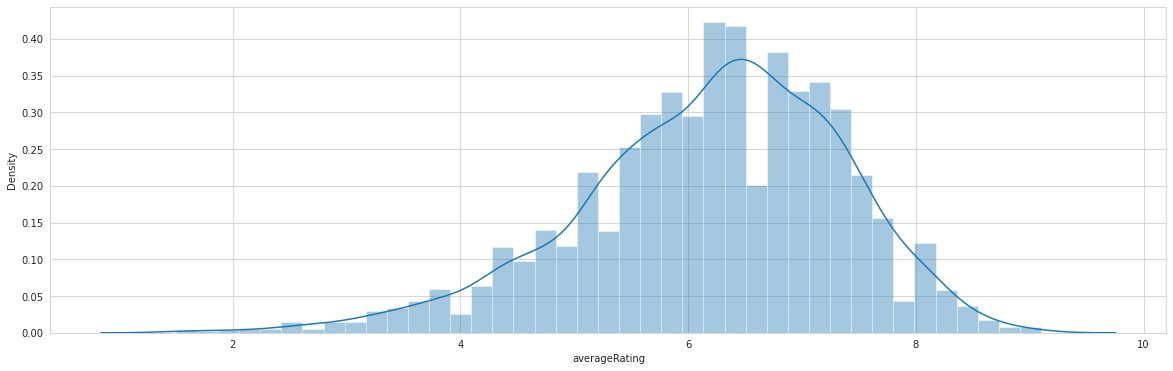

In [23]:
plt.figure(figsize=(20, 6))
sns.distplot(df_movie['averageRating'])

- 넷플릭스 전체 컨텐츠에 대한 평점은 평균은 약 6.2점입니다.
- 사분위 범위(Interquartile range)의 평점으로 5.5~ 7.0 사이값이 주로 나타나고 있습니다. 평점이 7.0이상이면 평가가 높은 컨텐츠로 볼수 있겠습니다.

연도별로 평점이 높거나 인기가 많은(votes수기준) 컨텐츠를 알아보겠습니다.

---
여기부터 추가된 내용이에요~~~ 

## 연도별 인기 상위 컨텐츠
- 인기 컨텐츠는 평점과 관계없이 사용자가 평가를 많이 남긴 것을 기준으로 했습니다. 평점이 저조해도 평점이 많이 남았다면 이슈가 되는 컨텐츠라고 생각할 수 있겠습니다.


In [26]:
def get_top_mv(year, n_top=5 ):
    topvote_mv = df_movie.sort_values(['year_added','numVotes'], ascending=[True, False]).groupby('year_added').head(n_top)
    topvote_mv =topvote_mv[['year_added','title','country', 'averageRating', 'numVotes', 'release_year']]
    
    return topvote_mv[topvote_mv.year_added==year]
    
def get_top_tv(year, n_top=5):    
    topvote_tv = df_tvshow.sort_values(['year_added','numVotes'], ascending=[True, False]).groupby('year_added').head(n_top)
    topvote_tv = topvote_tv[['year_added','title','country', 'averageRating', 'numVotes','release_year']]
    
    return topvote_tv[topvote_tv.year_added==year]

### 2021년 인기 Movie Top5

In [27]:
get_top_mv(2021, 5)

,year_added,title,country,averageRating,numVotes,release_year
157,2021,inception,"United States, United Kingdom",8.8,2242516,2010
189,2021,django unchained,United States,8.5,1475971,2012
3889,2021,the departed,"United States, Hong Kong",8.5,1273378,2006
593,2021,shutter island,United States,8.2,1241140,2010
3077,2021,goodfellas,United States,8.7,1103292,1990


### 2020년 인기 Movie Top5

In [28]:
get_top_mv(2020, 5)

,year_added,title,country,averageRating,numVotes,release_year
3978,2020,the lord of the rings: the return of the king,"New Zealand, United States",9.0,1759627,2003
3979,2020,the lord of the rings: the two towers,"New Zealand, United States",8.8,1589815,2002
2657,2020,american beauty,United States,8.4,1124420,1999
3275,2020,kill bill: vol. 1,"United States, Japan",8.2,1073577,2003
2589,2020,a clockwork orange,"United Kingdom, United States",8.3,803120,1971


- 실제 영화가 출시된지 오래된 영화들이 인기 영화로 나타나는 모습입니다. 이는 넷플릭스의 추천 시스템에 의해 사용자들이 최신작이 아니어도 취향에 따라 컨텐츠를 선택하는 것 때문으로 볼수 있겠습니다. 새로운 컨텐츠를 제공하는것 만큼이나 이미 재미나 가치가 검증된 컨텐츠를 사용자가 이용할 수 있도록 하는 것이 중요한데, 넥플릭스는 추천 시스템으로 이를 잘활용하고 있는것 같습니다.

- 또한 평가를 많이 받은 컨텐츠는 평점이 8점대 이상으로 좋게 나타나고 있습니다. 평가수와 평점간에 상관관계가 있다고 보입니다.

### 2021년 인기 Tv show Top5

In [29]:
get_top_tv(2021)

,year_added,title,country,averageRating,numVotes,release_year
6,2021,squid game,NaN,8.1,405251,2021
114,2021,attack on titan,Japan,9.1,329266,2013
108,2021,lupin,"France, United States",7.5,98522,2021
195,2021,demon slayer: kimetsu no yaiba,Japan,8.8,81899,2019
137,2021,shadow and bone,United States,7.7,75882,2021


### 2020년 인기 Tv show Top5

In [30]:
get_top_tv(2020)

,year_added,title,country,averageRating,numVotes,release_year
210,2020,bridgerton,United States,7.3,99234,2020
276,2020,emily in paris,United States,7.0,81536,2020
424,2020,locke & key,"Canada, United States",7.5,72408,2020
254,2020,paranormal,Egypt,8.6,71146,2020
367,2020,space force,United States,6.7,58004,2020


- TV show의 경우는 영화와 다르게 최근에 제작된 컨텐츠의 인기도가 높습니다. 작년 이슈가 되었던 컨텐츠인 오징어 게임이 2021년 1위로 랭크된것도 확인할수 있습니다.
- Tv show 부분에서는 넷플릭스 오리지널 컨텐츠 전략이, movie부분에서는 추천 시스템 전략이 많이 통하는 모습입니다. 


## 연도별 평점 상위 컨텐츠
- 평점시스템에서 평가자가 적은 상태에서 나온 점수는 신빙성이 떨어질수 있습니다. 연도별로 평균 평가자수(meanVotes) 이상이 평가한 컨텐츠를 대상으로 평점을 산출하였습니다.

In [160]:
df_counts[df_counts.index == 2009]

,release_year,month_added,averageRating,numVotes,startYear,sizes,meanVotes
year_added,,,,,,,
2009,4016,16,10.4,5411,4016,2,2705


### 연도별 평점 상위 컨텐츠



In [73]:
df_counts[df_counts.index == 2009]

,release_year,month_added,averageRating,numVotes,startYear,sizes,meanVotes
year_added,,,,,,,
2009,4016,16,10.4,5411,4016,2,2705


In [1]:
top5_movie = df_movie.sort_values(['year_added','averageRating'], ascending=[True, False]).groupby('year_added').head(5)


NameError: name 'df_movie' is not defined

In [ ]:
df_rating_mv = df_movie[[ 'year_added', 'numVotes', 'averageRating']]
df_rating_mv['meanVotes'] = df_movie[['numVotes', 'year_added', 'averageRating']]

In [84]:
df_rating_mv = df_movie[[ 'year_added', 'numVotes', 'averageRating']]

In [86]:
df_counts[df_counts.index == 2009].meanVotes

year_added
2009    2705
Name: meanVotes, dtype: int64

In [ ]:
df_movie['months'] = df_movie.year_added.map(str) + "-" + df_movie.month_added

year_added
2009    2705
Name: meanVotes, dtype: int64

In [79]:
df_counts[df_counts.index == 2012].meanVotes

year_added
2012    13957
Name: meanVotes, dtype: int64

In [76]:
df_rating_mv = df_movie[[ 'year_added', 'numVotes', 'averageRating']]



,year_added,numVotes,averageRating
0,2021,6233,7.4
1,2021,3261,6.9
2,2021,662,7.0
3,2021,11579,6.3
4,2021,789,5.4
...,...,...,...
4219,2018,436,7.0
4220,2019,516125,7.7
4221,2019,555443,7.6
4222,2020,20814,4.3


In [74]:
df_rating_mv['meanVotes'] = df_movie[['numVotes', 'year_added', 'averageRating']]
df_rating_mv

NameError: name 'df_rating_mv' is not defined

In [ ]:
df_movie_new = df_movie[df_movie.numVotes> ]

In [61]:

def get_topcontent(n=3):
    top_mv = df_movie.sort_values(['year_added','averageRating'], ascending=[True, False]).groupby('year_added').head(n)
    top_tv = df_tvshow.sort_values(['year_added','averageRating'], ascending=[True, False]).groupby('year_added').head(n)
    
    return top_mv, top_tv

top_mv, top_tv = get_topcontent(3)

In [63]:
df_counts.head()

,release_year,month_added,averageRating,numVotes,startYear,sizes,meanVotes
year_added,,,,,,,
2009,4016,16,10.4,5411,4016,2,2705
2011,2010,5,7.4,13387,2010,1,13387
2012,4023,13,13.1,27914,4023,2,13957
2013,4026,24,14.3,5053,4026,2,2526
2014,18124,60,66.2,35435,18124,9,3937


In [64]:
df_movie['numVotes'].describe()

count    4.224000e+03
mean     4.115040e+04
std      1.254068e+05
min      5.000000e+00
25%      6.245000e+02
50%      3.500000e+03
75%      2.271625e+04
max      2.242516e+06
Name: numVotes, dtype: float64

41150 

Movie 평가수와 평점 상관관계: 0.28005578514817964


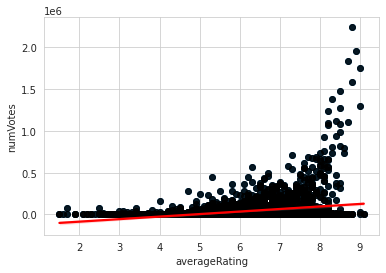

In [162]:
print('Movie 평가수와 평점 상관관계:', df_movie.numVotes.corr(df_movie.averageRating))

plt.scatter(df_movie.averageRating , df_movie.numVotes)
plt.xlabel('averageRating')
plt.ylabel('numVotes')
sns.regplot(x= df_movie.averageRating, y = df_movie.numVotes , line_kws={"color": "red"}, scatter_kws={"color": "black"})   
plt.show()

Tvshow 평가수와 평점 상관관계: 0.15461443114813228


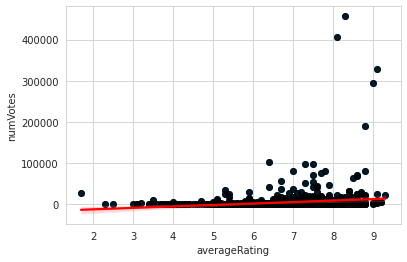

In [161]:
print('Tvshow 평가수와 평점 상관관계:', df_tvshow.numVotes.corr(df_tvshow.averageRating))

plt.scatter(df_tvshow.averageRating , df_tvshow.numVotes)
plt.xlabel('averageRating')
plt.ylabel('numVotes')
sns.regplot(x= df_tvshow.averageRating, y = df_tvshow.numVotes , line_kws={"color": "red"}, scatter_kws={"color": "black"})   
plt.show()

In [ ]:
 top 10으로 보면 우리나라 tv show가 더 많은것을 확인 이 경향이 언제까지 계속 될지 모르지만 마트 PB상품도 손님들이 계속쓰면 질릴때가 있는 것처럼 오리지널 컨테츠를 